In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


In [2]:

data = pd.read_csv("data.csv")

print("Formato dos dados:", data.shape)
data.head()


Formato dos dados: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

print("Features:", X.shape, "Target:", y.shape)

Features: (569, 30) Target: (569,)


In [5]:

# === Definição dos modelos ===
models = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (SVC(probability=True, random_state=42), "SVM"),
    (KNeighborsClassifier(n_neighbors=5), "KNN"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting")
]



In [14]:

# === Configuração da validação cruzada ===
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1": make_scorer(f1_score, average="weighted"),
}

cv = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)


In [15]:
# === Cross-validation e resultados ===
results = {}

# Convert target variable to numerical (0 for B, 1 for M)
y_numeric = y.map({'B': 0, 'M': 1})

for model, name in models:
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    cv_results = cross_validate(pipeline, X, y_numeric, cv=cv, scoring=scoring, return_train_score=False)
    results[name] = {metric: (np.mean(cv_results[f"test_{metric}"]), np.std(cv_results[f"test_{metric}"])) for metric in scoring.keys()}

# Tabela de resultados
results_df = pd.DataFrame(results).T
results_df.columns = [f"{metric}_mean_std" for metric in scoring.keys()]
results_df

,accuracy_mean_std,precision_mean_std,recall_mean_std,f1_mean_std
Logistic Regression,"(0.979090909090909, 0.04145427963763793)","(0.982412037037037, 0.03440439358510104)","(0.979090909090909, 0.04145427963763793)","(0.9784186630363101, 0.04344887301352581)"
Random Forest,"(0.9613636363636363, 0.052840569674157)","(0.9655757575757576, 0.049099744254894)","(0.9613636363636363, 0.052840569674157)","(0.9608417160181866, 0.053354060382794014)"
SVM,"(0.9772727272727272, 0.04247832051174602)","(0.9809343434343434, 0.03519498780047452)","(0.9772727272727272, 0.04247832051174602)","(0.9765985702750407, 0.044399251150141615)"
KNN,"(0.971969696969697, 0.04832478313277898)","(0.9763606902356902, 0.03987841910693807)","(0.971969696969697, 0.04832478313277898)","(0.9706752659105601, 0.051425264640339384)"
Naive Bayes,"(0.9293939393939393, 0.07309628604776117)","(0.940679292929293, 0.06284883997380096)","(0.9293939393939393, 0.07309628604776117)","(0.9275028305028306, 0.07552798418613793)"
Gradient Boosting,"(0.9683333333333333, 0.05221648269653394)","(0.9724675925925926, 0.0466109709882068)","(0.9683333333333333, 0.05221648269653394)","(0.9677426723603194, 0.05358957739980044)"


/tmp/ipython-input-272457594.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_plot = results_df.applymap(lambda x: x[0])  # pegar apenas as médias


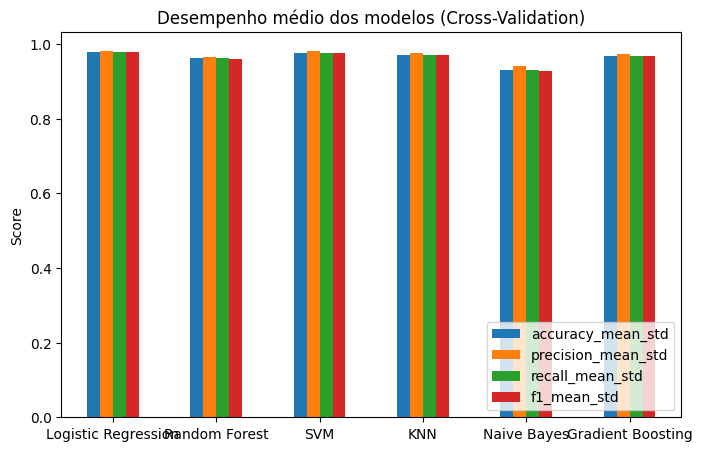

In [16]:

# === Visualização dos resultados ===
fig, ax = plt.subplots(figsize=(8,5))
results_plot = results_df.applymap(lambda x: x[0])  # pegar apenas as médias
results_plot.plot(kind="bar", ax=ax)
plt.title("Desempenho médio dos modelos (Cross-Validation)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
